In [2]:
import pandas as pd
df=pd.read_csv('gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


# ***EDA***

In [3]:
df.isnull().sum()


id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [6]:
df.drop(['id'],axis=1,inplace=True)


In [7]:
df.head()


,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [8]:
df.describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [9]:
numerical_cols=df.columns[df.dtypes!='object']
categorical_cols=df.columns[df.dtypes=='object']

In [10]:
numerical_cols

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [11]:
categorical_cols

Index(['cut', 'color', 'clarity'], dtype='object')

In [12]:
df.nunique()

carat       248
cut           5
color         7
clarity       8
depth       153
table       108
x           522
y           521
z           349
price      8738
dtype: int64

In [13]:
df[categorical_cols].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [14]:
df.shape

(193573, 10)

In [15]:
df['cut'].value_counts()

Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: cut, dtype: int64

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: >

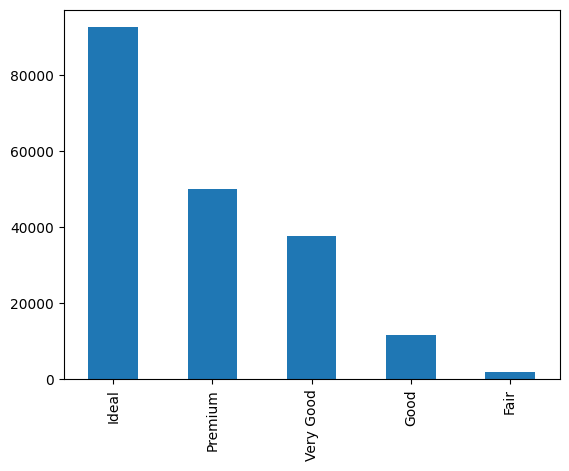

In [17]:
df['cut'].value_counts().plot(kind='bar')

<Axes: >

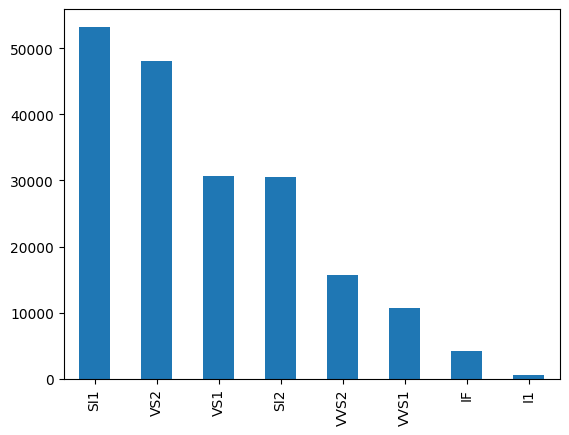

In [18]:
df['clarity'].value_counts().plot(kind='bar')

<ipython-input-19-66f91822dbac>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values(ascending=False).plot(kind='bar')


<Axes: >

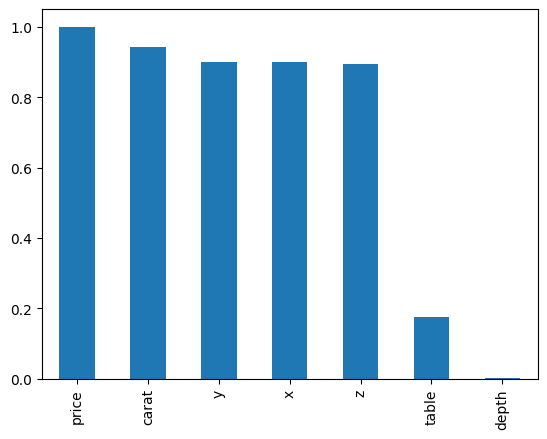

In [19]:
df.corr()['price'].sort_values(ascending=False).plot(kind='bar')

<ipython-input-20-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

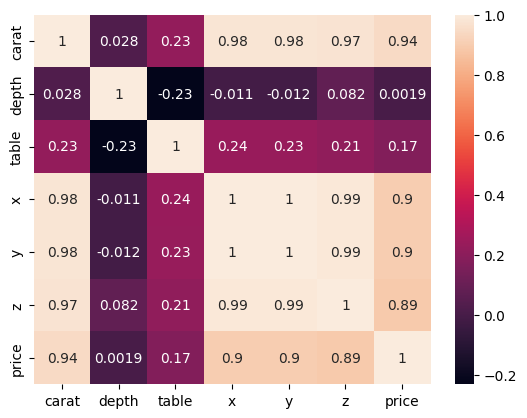

In [20]:
sns.heatmap(df.corr(),annot=True)

In [21]:
cut_map={'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}

In [22]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [23]:
cut_map

{'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}

In [24]:
clarity_map={'I1':1,'SI2':2, 'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7, 'IF':8}

In [25]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [26]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [27]:
color_map={'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7}

In [28]:
df['cut']=df['cut'].map(cut_map)
df['clarity']=df['clarity'].map(clarity_map)
df['color']=df['color'].map(color_map)

In [29]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


In [30]:
x=df.iloc[:,:-1]
y=df['price']

In [31]:
x

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...,...,...,...
193568,0.31,5,1,6,61.1,56.0,4.35,4.39,2.67
193569,0.70,4,4,6,60.3,58.0,5.75,5.77,3.47
193570,0.73,3,3,3,63.1,57.0,5.72,5.75,3.62
193571,0.34,3,1,3,62.9,55.0,4.45,4.49,2.81


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [34]:
x_train.shape

(135501, 9)

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
ss=StandardScaler()

In [37]:
x_train_scaled=ss.fit_transform(x_train)
x_train_scaled

array([[-0.82314374,  0.87410007, -0.93674681, ..., -0.78045073,
        -0.83510329, -0.87602377],
       [ 0.94502267, -1.13764403,  0.91085333, ...,  1.07322572,
         1.16638856,  0.94663261],
       [ 1.9584839 , -0.13177198,  0.91085333, ...,  1.70311578,
         1.75506264,  1.74223659],
       ...,
       [ 0.92345966, -0.13177198,  0.29498662, ...,  0.99223986,
         0.92186241,  1.0478913 ],
       [-1.03877378, -1.13764403,  0.29498662, ..., -1.21237535,
        -1.19736425, -1.25212747],
       [-1.03877378, -1.13764403,  0.29498662, ..., -1.23937063,
        -1.2154773 , -1.20873089]])

In [38]:
x_test_scaled=ss.transform(x_test)
x_test_scaled

array([[-0.62907669,  0.87410007, -1.55261352, ..., -0.60048215,
        -0.58152061, -0.57224771],
       [ 2.60537405, -1.13764403,  0.29498662, ...,  2.12604196,
         2.19883232,  1.9592195 ],
       [-1.1250258 , -0.13177198, -0.93674681, ..., -1.37434708,
        -1.41472084, -1.46911037],
       ...,
       [-0.82314374,  0.87410007,  0.29498662, ..., -0.83444131,
        -0.86227286, -0.84709272],
       [ 0.90189666, -0.13177198,  1.52672004, ...,  1.04623044,
         0.96714503,  0.93216709],
       [ 0.47063656, -1.13764403, -0.93674681, ...,  0.55131682,
         0.66827973,  0.70071866]])

In [39]:
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet

In [40]:
lr=LinearRegression()

In [41]:
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [42]:
lr.intercept_

3976.8787389023005

In [43]:
lr.coef_

array([ 6432.97591819,    68.80035873,  -464.67990411,   652.10059539,
        -132.34206204,   -70.48787525, -1701.38593925,  -494.17005097,
         -76.32351645])

In [44]:
y_pred=lr.predict(x_test_scaled)
y_pred[0:5]

array([ 1616.03275998, 15104.13631181,  1727.49228115,   676.87906256,
        6502.46293469])

In [45]:
y_test[0:5]

14868      1355
165613    14691
96727       844
145593      707
118689     5797
Name: price, dtype: int64

In [46]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.9362906819996045

In [47]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [48]:
mae=mean_absolute_error(y_test,y_pred)
mae

675.075827006745

In [49]:
mse=mean_squared_error(y_test,y_pred)
mse
import numpy as np

In [50]:
rmse=np.sqrt(mse)
rmse

1014.6296630375485

In [51]:
from sklearn.metrics import r2_score

In [52]:
score

0.9362906819996045

In [53]:
lasso=Lasso()

In [54]:
lasso.fit(x_train_scaled,y_train)

Lasso()

In [55]:
y_pred_lasso=lasso.predict(x_test_scaled)
y_pred_lasso[0:5]

array([ 1623.46388402, 15093.85514272,  1700.81186704,   674.89260725,
        6521.3548511 ])

In [56]:
y_test[0:5]

14868      1355
165613    14691
96727       844
145593      707
118689     5797
Name: price, dtype: int64

In [57]:
r2_score(y_pred_lasso,y_test)

0.9313705403170895

In [58]:
els=ElasticNet()

In [59]:
els.fit(x_train_scaled,y_train)
y_pred_els=els.predict(x_test_scaled)
r2_score(y_pred_els,y_test)

0.7785506165736235

## now we will solve it by **ANN**

In [60]:
!pip install tensorflow

In [61]:
import tensorflow as tf

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [63]:
reg=Sequential()

In [104]:
## creating Input Layer

reg.add(Dense(units=10,activation='relu'))

In [65]:
df.shape

(193573, 10)

In [107]:
## Creating Hidden Layer
reg.add(Dense(units=78,activation='relu'))
reg.add(Dropout(0.2))
reg.add(Dense(units=39,activation='relu'))
reg.add(Dropout(0.2))
reg.add(Dense(units=19,activation='relu'))
reg.add(Dropout(0.2))



In [108]:
## Output Layer
reg.add(Dense(units=1,activation='linear'))

In [109]:
reg.compile(optimizer='adam',loss='mae',metrics=['accuracy'])

In [110]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=3,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [70]:
df.shape

(193573, 10)

In [113]:
model_history=reg.fit(x_train_scaled,y_train,batch_size=70 ,verbose=1,epochs=70,validation_split=.33,callbacks=early_stopping)

Epoch 1/70
1297/1297 [==============================] - 14s 11ms/step - loss: 764.2181 - accuracy: 0.0000e+00 - val_loss: 901.4514 - val_accuracy: 0.0000e+00
Epoch 2/70
1297/1297 [==============================] - 15s 12ms/step - loss: 752.2173 - accuracy: 0.0000e+00 - val_loss: 929.1009 - val_accuracy: 0.0000e+00
Epoch 3/70
1297/1297 [==============================] - 15s 11ms/step - loss: 746.2266 - accuracy: 0.0000e+00 - val_loss: 788.7247 - val_accuracy: 0.0000e+00
Epoch 4/70
1297/1297 [==============================] - 14s 11ms/step - loss: 748.5935 - accuracy: 0.0000e+00 - val_loss: 868.6071 - val_accuracy: 0.0000e+00
Epoch 5/70
1297/1297 [==============================] - 15s 12ms/step - loss: 745.0726 - accuracy: 0.0000e+00 - val_loss: 622.3669 - val_accuracy: 0.0000e+00
Epoch 6/70
1297/1297 [==============================] - 14s 11ms/step - loss: 744.7889 - accuracy: 0.0000e+00 - val_loss: 1037.1096 - val_accuracy: 0.0000e+00
Epoch 7/70
1297/1297 [=============================